In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale

import statsmodels.formula.api as smf

In [75]:
df = pd.read_csv('./baseball/core/Teams.csv')

In [76]:
df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.838,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.814,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.839,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2835 entries, 0 to 2834
Data columns (total 48 columns):
yearID            2835 non-null int64
lgID              2785 non-null object
teamID            2835 non-null object
franchID          2835 non-null object
divID             1318 non-null object
Rank              2835 non-null int64
G                 2835 non-null int64
Ghome             2436 non-null float64
W                 2835 non-null int64
L                 2835 non-null int64
DivWin            1290 non-null object
WCWin             654 non-null object
LgWin             2807 non-null object
WSWin             2478 non-null object
R                 2835 non-null int64
AB                2835 non-null int64
H                 2835 non-null int64
2B                2835 non-null int64
3B                2835 non-null int64
HR                2835 non-null int64
BB                2835 non-null int64
SO                2715 non-null float64
SB                2691 non-null float64
CS    

In [78]:
df = df[df["yearID"]>=1977]
df.drop('Rank', axis=1, inplace=True)
df.fillna(0, inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126 entries, 1709 to 2834
Data columns (total 47 columns):
yearID            1126 non-null int64
lgID              1126 non-null object
teamID            1126 non-null object
franchID          1126 non-null object
divID             1126 non-null object
G                 1126 non-null int64
Ghome             1126 non-null float64
W                 1126 non-null int64
L                 1126 non-null int64
DivWin            1126 non-null object
WCWin             1126 non-null object
LgWin             1126 non-null object
WSWin             1126 non-null object
R                 1126 non-null int64
AB                1126 non-null int64
H                 1126 non-null int64
2B                1126 non-null int64
3B                1126 non-null int64
HR                1126 non-null int64
BB                1126 non-null int64
SO                1126 non-null float64
SB                1126 non-null float64
CS                1126 non-null float64


In [80]:
def winPer(w, l):
    return w/(w+l)
df['winP'] = df.apply(lambda row : winPer(row['W'], row['L']), axis=1)

In [81]:
quant = pd.DataFrame(df.loc[:, ~(df.dtypes == object)])
quant.drop(['L'], axis=1, inplace=True)
quant.rename(columns={'2B':'doubles', '3B': 'triples'}, inplace=True)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(quant.drop(['winP', 'W'], axis=1), quant['W'], test_size=0.33, random_state=42)

In [83]:
train = pd.DataFrame(pd.concat([X_train, y_train], axis=1))
equation = "+".join(str(x) for x in quant.drop(['winP', 'W'], axis=1).columns) 

In [84]:
linreg = smf.ols('W~'+equation, data=train).fit()
preds = linreg.predict(X_test)
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     388.9
Date:                Wed, 13 Dec 2017   Prob (F-statistic):               0.00
Time:                        14:36:44   Log-Likelihood:                -1870.0
No. Observations:                 754   AIC:                             3806.
Df Residuals:                     721   BIC:                             3959.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    142.7036    264.856      0.539      0.590    -377.278     662.685
yearID        -0.0136      0.037     -0.372      0.710      -0.085       0.058
G             -0.0196      0.108     -0.181      0.857      -0.233       0.193
Ghome          0.0304      0.119      0.254      0.799      -0.204       0.265
R              0.0778      0.005     15.968      0.000       0.068       0.087
AB            -0.0450      0.005     -9.969      0.000      -0.054      -0.036
H              0.0384      0.005      7.155      0.000       0.028       0.049
doubles       -0.0090      0.005     -1.658      0.098      -0.020       0.002
triples       -0.0098      0.013     -0.737      0.461      -0.036       0.016
HR             0.0194      0.007      2.871      0.004       0.006       0.033
BB            -0.0015      0.003     -0.572      0.568      -0.007       0.004
SO             0.0019      0.001      1.272      0.204      -0.001       0.005
SB             0.0078      0.004      1.831      0.068      -0.001       0.016
CS            -0.0454      0.012     -3.644      0.000      -0.070      -0.021
HBP            0.0157      0.010      1.554      0.121      -0.004       0.036
SF            -0.0007      0.014     -0.053      0.958      -0.027       0.026
RA            -0.0264      0.012     -2.168      0.031      -0.050      -0.002
ER            -0.0342      0.021     -1.619      0.106      -0.076       0.007
ERA            2.5319      2.758      0.918      0.359      -2.883       7.946
CG             0.1578      0.019      8.501      0.000       0.121       0.194
SHO            0.1401      0.039      3.582      0.000       0.063       0.217
SV             0.3522      0.020     17.395      0.000       0.312       0.392
IPouts         0.0620      0.006     10.092      0.000       0.050       0.074
HA            -0.0078      0.004     -2.191      0.029      -0.015      -0.001
HRA           -0.0267      0.007     -3.674      0.000      -0.041      -0.012
BBA           -0.0087      0.003     -3.098      0.002      -0.014      -0.003
SOA           -0.0005      0.001     -0.314      0.754      -0.003       0.002
E             -0.0547      0.042     -1.303      0.193      -0.137       0.028
DP            -0.0051      0.008     -0.660      0.510      -0.020       0.010
FP          -126.9598    257.764     -0.493      0.622    -633.018     379.099
attendance  4.427e-07   2.07e-07      2.142      0.033    3.69e-08    8.48e-07
BPF           -0.1108      0.178     -0.624      0.533      -0.459       0.238
PPF            0.0919      0.175      0.524      0.600      -0.252       0.436
==============================================================================
Omnibus:                        0.538   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.764   Jarque-Bera (JB):                0.430
Sk

In [ ]:
linreg.mse_model

In [12]:
mseOLS = mean_squared_error(y_test, preds)
print('Test MSE: ' + str(mseOLS))

Test MSE: 8.70201891163


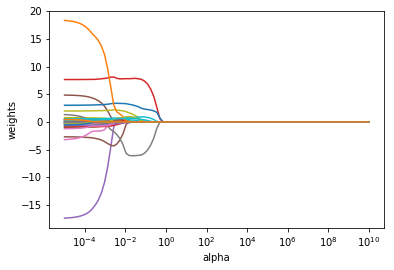

In [13]:
lasso = Lasso(max_iter=10000, normalize=True)
alphas = 10**np.linspace(10, -5, 100) * 0.5

coeffs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(scale(X_train), y_train)
    coeffs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas * 2, coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

plt.show()

In [14]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mseLasso = mean_squared_error(y_test, lasso.predict(X_test))
print(pd.Series(lasso.coef_, index=X_test.columns))
print('Lasso Test MSE: ' + str(mseLasso))

yearID       -0.000000e+00
G            -0.000000e+00
Ghome         3.233054e-02
R             7.908345e-02
AB           -3.469617e-02
H             2.848686e-02
doubles      -7.957369e-03
triples      -7.661514e-03
HR            1.752223e-02
BB            1.636732e-04
SO            9.137350e-04
SB            5.965555e-03
CS           -3.027177e-02
HBP           1.539973e-02
SF            0.000000e+00
RA           -3.132322e-02
ER           -1.699786e-02
ERA          -0.000000e+00
CG            1.629114e-01
SHO           1.443522e-01
SV            3.627380e-01
IPouts        4.777618e-02
HA           -6.136454e-03
HRA          -2.519225e-02
BBA          -7.635477e-03
SOA           0.000000e+00
E            -3.191805e-02
DP           -5.321598e-03
FP            0.000000e+00
attendance    4.832733e-07
BPF          -1.383427e-02
PPF          -0.000000e+00
dtype: float64
Lasso Test MSE: 8.6862336501


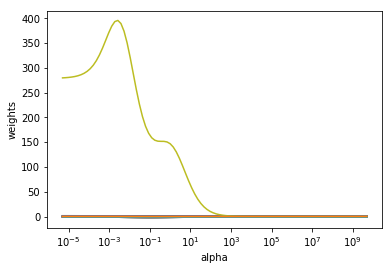

In [15]:
ridge = Ridge(normalize=True)
coeffs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_test, y_test)
    coeffs.append(ridge.coef_)
    
np.shape(coeffs)
ax = plt.gca()
ax.plot(alphas, coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [16]:
ridge2 = RidgeCV(alphas=range(-2,10), cv=10, normalize=True)
ridge2.fit(X_train, y_train)
pred2 = ridge2.predict(X_test)
mseRidge = mean_squared_error(y_test, pred2)
print (pd.Series(ridge2.coef_, index=X_test.columns))
print ('Ridge Test MSE: ' + str(mseRidge))

yearID       -1.360639e-02
G            -1.958988e-02
Ghome         3.039373e-02
R             7.784780e-02
AB           -4.498381e-02
H             3.841008e-02
doubles      -9.025026e-03
triples      -9.843823e-03
HR            1.943277e-02
BB           -1.531503e-03
SO            1.885243e-03
SB            7.781069e-03
CS           -4.541202e-02
HBP           1.571587e-02
SF           -7.195933e-04
RA           -2.638960e-02
ER           -3.416815e-02
ERA           2.531860e+00
CG            1.577693e-01
SHO           1.401012e-01
SV            3.521725e-01
IPouts        6.204138e-02
HA           -7.763639e-03
HRA          -2.669322e-02
BBA          -8.703601e-03
SOA          -4.690400e-04
E            -5.471391e-02
DP           -5.076946e-03
FP           -1.269598e+02
attendance    4.426878e-07
BPF          -1.107520e-01
PPF           9.187922e-02
dtype: float64
Ridge Test MSE: 8.70201891163


In [17]:
best = min(mseOLS, mseLasso, mseRidge)
print('# Betas in OLS: ' + str(len(linreg.params)))
print('OLS Test MSE: {:,.6f}'.format(mseOLS) + ', ' 
      + str((np.round(mseOLS/best, 4) - 1)*100) + "% delta from best MSE")
print('Ridge Test MSE: {:,.6f}'.format(mseRidge) 
      + ', ' + str((np.round(mseRidge/best, 4) - 1)*100) + "% delta from best MSE")
print('Lasso Test MSE: {:,.6f}'.format(mseLasso)
      + ', ' + str((np.round(mseLasso/best, 4) - 1)*100) + "% delta from best MSE")
print('Lasso Betas <> 0: ' + str(len(lasso.coef_[lasso.coef_ != 0])))
print('Lasso Betas ~<> 0 (10^-4): ' + str(len(lasso.coef_[np.abs(lasso.coef_) > 0.0001])))

# Betas in OLS: 33
OLS Test MSE: 8.702019, 0.18% delta from best MSE
Ridge Test MSE: 8.702019, 0.18% delta from best MSE
Lasso Test MSE: 8.686234, 0.0% delta from best MSE
Lasso Betas <> 0: 25
Lasso Betas ~<> 0 (10^-4): 24


In [18]:
lsb = pd.DataFrame(lasso.coef_, index=X_test.columns, columns=['Betas'])
lsb = lsb[np.abs(lsb['Betas']) > 0.0001]
print(lsb)

            Betas
Ghome    0.032331
R        0.079083
AB      -0.034696
H        0.028487
doubles -0.007957
triples -0.007662
HR       0.017522
BB       0.000164
SO       0.000914
SB       0.005966
CS      -0.030272
HBP      0.015400
RA      -0.031323
ER      -0.016998
CG       0.162911
SHO      0.144352
SV       0.362738
IPouts   0.047776
HA      -0.006136
HRA     -0.025192
BBA     -0.007635
E       -0.031918
DP      -0.005322
BPF     -0.013834


In [58]:
cols = quant.drop(['winP', 'W'], axis=1).columns
drop = ['SV', 'Rank', 'Wins', 'Losses', 'DivWin', 'WCWin', 'LgWin',
       'WSWin', 'HRA', 'HA', 'IPPouts', 'BPF', 'PPF', 'winP', 'W'
       'SHO', 'SO']
cols = [x for x in cols if x not in drop]

In [59]:
train = pd.DataFrame(pd.concat([X_train, y_train], axis=1))
equation = "+".join(str(x) for x in cols) 
mse = []

cols[0:0]
for i in range(1,len(cols)):
    equation = "+".join(str(x) for x in cols[0:i])
    linreg = smf.ols('W~'+equation, data=train).fit()
    preds = linreg.predict(X_test)
    mse.append(mean_squared_error(y_test, preds))

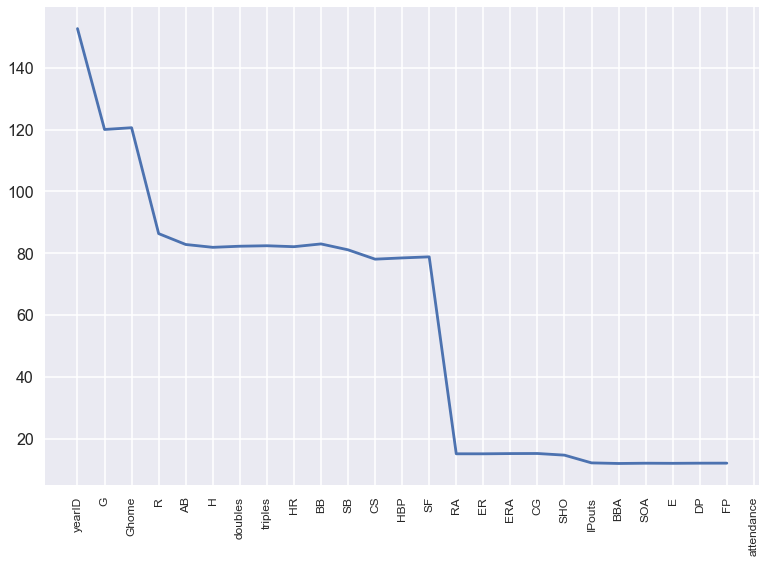

In [60]:
fig, ax = plt.subplots(1,1) 
ax.plot(mse)
ax.set_xticks(range(0,len(cols)))
ax.set_xticklabels(cols, rotation='vertical', fontsize=12)
fig.savefig('forwardSelectionMSE.png')

In [62]:
equation = "+".join(str(x) for x in cols) 
equation

'yearID+G+Ghome+R+AB+H+doubles+triples+HR+BB+SO+SB+CS+HBP+SF+ERA+CG+SHO+SV+IPouts+HA+HRA+BBA+SOA+E+DP+FP+attendance+BPF+PPF'

In [63]:
train = pd.DataFrame(pd.concat([X_train, y_train], axis=1))
equation = "+".join(str(x) for x in quant.drop(['winP', 'W'], axis=1).iloc[:,0:15].columns) 
linreg = smf.ols('W~'+equation, data=train).fit()
preds = linreg.predict(X_test)
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     45.01
Date:                Wed, 13 Dec 2017   Prob (F-statistic):           1.80e-93
Time:                        11:53:10   Log-Likelihood:                -2720.2
No. Observations:                 754   AIC:                             5472.
Df Residuals:                     738   BIC:                             5546.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -203.3501    155.808     -1.305      0.192    -509.230     102.529
yearID         0.1023      0.078      1.307      0.192      -0.051       0.256
G              1.4016      0.293      4.778      0.000       0.826       1.977
Ghome          0.0694      0.352      0.197      0.844      -0.621       0.760
R              0.0603      0.014      4.182      0.000       0.032       0.089
AB            -0.0422      0.009     -4.851      0.000      -0.059      -0.025
H              0.0318      0.014      2.273      0.023       0.004       0.059
doubles       -0.0477      0.016     -2.947      0.003      -0.079      -0.016
triples        0.0084      0.040      0.209      0.834      -0.070       0.087
HR             0.0106      0.019      0.548      0.584      -0.027       0.049
BB             0.0249      0.007      3.379      0.001       0.010       0.039
SO            -0.0118      0.004     -2.750      0.006      -0.020      -0.003
SB             0.0487      0.013      3.888      0.000       0.024       0.073
CS            -0.1039      0.035     -3.013      0.003      -0.172      -0.036
HBP            0.0749      0.031      2.452      0.014       0.015       0.135
SF            -0.0750      0.041     -1.848      0.065      -0.155       0.005
==============================================================================
Omnibus:                        3.030   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                2.534
Skew:                          -0.020   Prob(JB):                        0.282
Kurtosis:                       2.719   Cond. No.                     2.91e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
mseOLS = mean_squared_error(y_test, preds)
print(mseOLS)

78.506311975


In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    quant[cols], quant['W'], test_size=0.33, random_state=42)

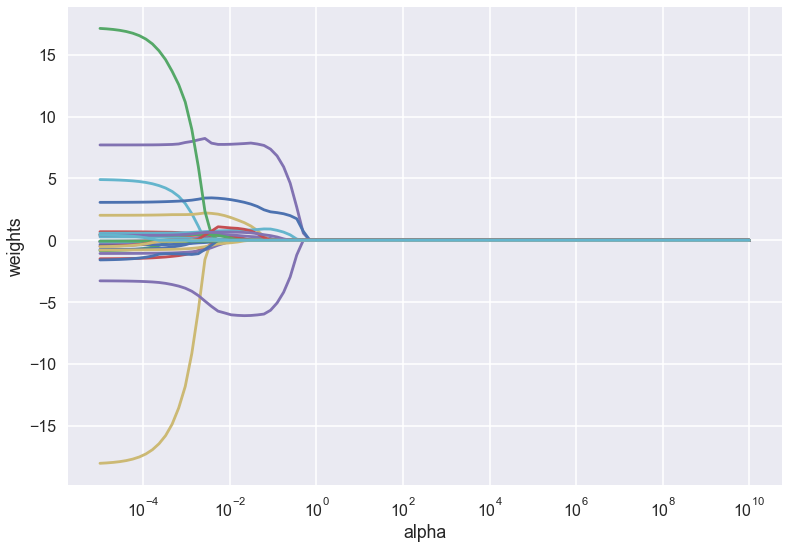

In [66]:
lasso = Lasso(max_iter=10000, normalize=True)
alphas = 10**np.linspace(10, -5, 100) * 0.5

coeffs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(scale(X_train), y_train)
    coeffs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas * 2, coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

plt.show()

In [67]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mseLasso = mean_squared_error(y_test, lasso.predict(X_test))
print(pd.Series(lasso.coef_, index=X_test.columns))
print('Lasso Test MSE: ' + str(mseLasso))

yearID       -0.000000e+00
G            -0.000000e+00
Ghome         4.281634e-02
R             7.900353e-02
AB           -3.659528e-02
H             2.960239e-02
doubles      -8.341372e-03
triples      -7.775954e-03
HR            1.616705e-02
BB           -1.411054e-04
SO            9.626653e-04
SB            5.767293e-03
CS           -3.047744e-02
HBP           1.425263e-02
SF           -0.000000e+00
ERA          -6.651683e+00
CG            1.659939e-01
SHO           1.461978e-01
SV            3.701268e-01
IPouts        4.409181e-02
HA           -9.730393e-03
HRA          -2.982228e-02
BBA          -1.006856e-02
SOA          -0.000000e+00
E            -4.803760e-02
DP           -3.409316e-03
FP            0.000000e+00
attendance    5.699316e-07
BPF          -1.496327e-02
PPF          -0.000000e+00
dtype: float64
Lasso Test MSE: 9.11968699058


In [68]:
ridge2 = RidgeCV(alphas=range(-2,10), cv=10, normalize=True)
ridge2.fit(X_train, y_train)
pred2 = ridge2.predict(X_test)
mseRidge = mean_squared_error(y_test, pred2)
print (pd.Series(ridge2.coef_, index=X_test.columns))
print ('Ridge Test MSE: ' + str(mseRidge))

yearID       -6.252635e-03
G            -7.787308e-02
Ghome         8.746510e-02
R             7.850990e-02
AB           -4.673485e-02
H             3.892607e-02
doubles      -9.260388e-03
triples      -9.869791e-03
HR            1.749440e-02
BB           -2.324462e-03
SO            1.874372e-03
SB            7.312519e-03
CS           -4.527484e-02
HBP           1.559773e-02
SF           -4.102157e-03
ERA          -5.972930e+00
CG            1.617993e-01
SHO           1.407143e-01
SV            3.594694e-01
IPouts        5.798042e-02
HA           -1.147791e-02
HRA          -3.148184e-02
BBA          -1.099987e-02
SOA          -6.240389e-04
E            -7.041294e-02
DP           -3.255951e-03
FP           -1.463122e+02
attendance    5.372238e-07
BPF          -1.072502e-01
PPF           8.820209e-02
dtype: float64
Ridge Test MSE: 9.14350572704


In [69]:
best = min(mseOLS, mseLasso, mseRidge)
print('# Betas in OLS: ' + str(len(linreg.params)))
print('OLS Test MSE: {:,.6f}'.format(mseOLS) + ', ' 
      + str((np.round(mseOLS/best, 4) - 1)*100) + "% delta from best MSE")
print('Ridge Test MSE: {:,.6f}'.format(mseRidge) 
      + ', ' + str((np.round(mseRidge/best, 4) - 1)*100) + "% delta from best MSE")
print('Lasso Test MSE: {:,.6f}'.format(mseLasso)
      + ', ' + str((np.round(mseLasso/best, 4) - 1)*100) + "% delta from best MSE")
print('Lasso Betas <> 0: ' + str(len(lasso.coef_[lasso.coef_ != 0])))
print('Lasso Betas ~<> 0 (10^-4): ' + str(len(lasso.coef_[np.abs(lasso.coef_) > 0.0001])))

# Betas in OLS: 16
OLS Test MSE: 78.506312, 760.84% delta from best MSE
Ridge Test MSE: 9.143506, 0.26% delta from best MSE
Lasso Test MSE: 9.119687, 0.0% delta from best MSE
Lasso Betas <> 0: 24
Lasso Betas ~<> 0 (10^-4): 23


In [70]:
import seaborn as sns
sns.set_context('poster')

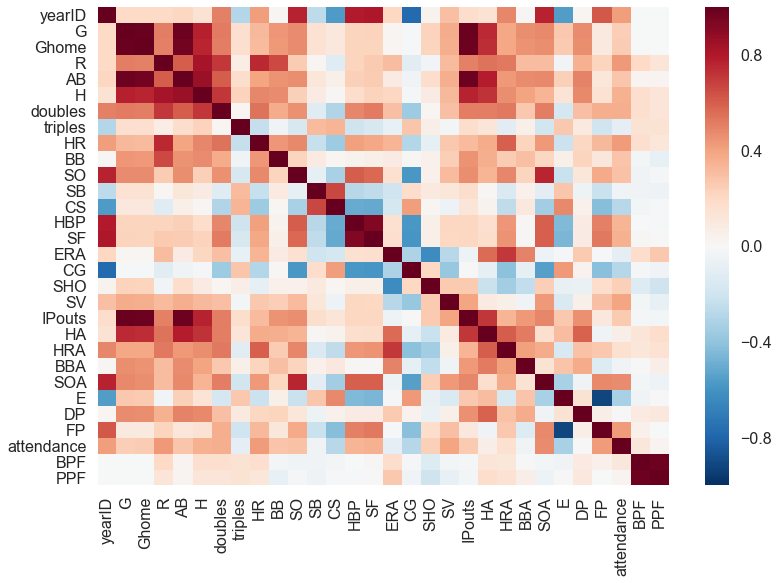

In [73]:
sns.heatmap(quant[cols].corr())

varience inflation for multiple colinarity, autocorrelation, 